fMRI behavioral performance analysis of Learning Brain data
--------------------------------------------------------------

The code below allows to visualize and analize data from 6-week working memory training study. Participants were scanned four times while performing dual n-back (Jaeggi et al., 2018). 

Three performance measures were calculated: 

- accuracy
- d-prime (dprime)
- penallized reaction time (prt)

Karolina Finc | Centre for Modern Interdisciplinary Technologies

Last edited: 29.05.2017

In [1]:
# Loading packages
library(tidyverse)
library(broom)

# Setting working directory
setwd("~/Dropbox/Projects/LearningBrain/")

# Loading data
performance <- read.csv("data/behavioral/LB_fmri_behaviour_tidy.csv")
performance$session <- as.factor(performance$session)

# Checking data
glimpse(performance)
summary(performance)

Warning message:
“package ‘tidyverse’ was built under R version 3.4.4”── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
Warning message:
“package ‘ggplot2’ was built under R version 3.4.4”Warning message:
“package ‘tibble’ was built under R version 3.4.4”Warning message:
“package ‘tidyr’ was built under R version 3.4.4”Warning message:
“package ‘readr’ was built under R version 3.4.4”Warning message:
“package ‘purrr’ was built under R version 3.4.4”Warning message:
“package ‘dplyr’ was built under R version 3.4.4”Warning message:
“package ‘stringr’ was built under R version 3.4.4”Warning message:
“package ‘forcats’ was built under R version 3.4.4”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning mess

Observations: 736
Variables: 9
$ sub      <fct> sub-01, sub-01, sub-01, sub-01, sub-01, sub-01, sub-01, su...
$ session  <fct> 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, 2...
$ n        <int> 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2...
$ modality <fct> audio, audio, audio, audio, audio, audio, audio, audio, au...
$ prt      <dbl> 1.1839700, 1.1663533, 1.0810033, 1.2020800, 1.1474633, 1.1...
$ dprime   <dbl> 4.040271, 3.475674, 4.137920, 3.409597, 3.202374, 3.535203...
$ accuracy <dbl> 90.23333, 82.25000, 88.25000, 81.25000, 86.23333, 86.24167...
$ sex      <fct> Female, Female, Female, Female, Female, Female, Female, Fe...
$ group    <fct> Control, Control, Control, Control, Control, Control, Cont...


      sub      session       n          modality        prt        
 sub-01 : 16   1:184   Min.   :1.0   audio  :368   Min.   :0.5096  
 sub-02 : 16   2:184   1st Qu.:1.0   spatial:368   1st Qu.:0.9782  
 sub-04 : 16   3:184   Median :1.5                 Median :1.1824  
 sub-05 : 16   4:184   Mean   :1.5                 Mean   :1.1729  
 sub-06 : 16           3rd Qu.:2.0                 3rd Qu.:1.3536  
 sub-07 : 16           Max.   :2.0                 Max.   :1.9649  
 (Other):640                                                       
     dprime           accuracy         sex               group    
 Min.   :0.09213   Min.   :49.13   Female:384   Control     :368  
 1st Qu.:2.67554   1st Qu.:86.24   Male  :352   Experimental:368  
 Median :3.25397   Median :88.24                                  
 Mean   :3.19157   Mean   :87.59                                  
 3rd Qu.:3.82074   3rd Qu.:89.25                                  
 Max.   :4.66723   Max.   :90.25                      

Accuracy
---------------------------

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.4”

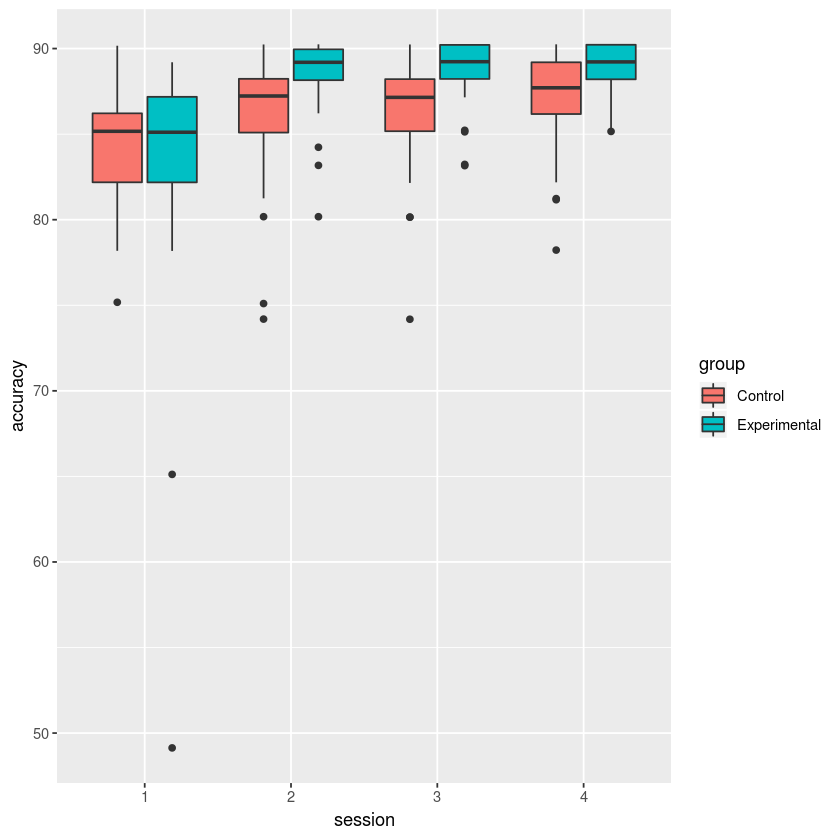

In [7]:
performance %>% group_by(group) %>% filter(n == 2) %>% ggplot(aes(session,accuracy, fill = group)) +
    geom_boxplot() # +
    #facet_wrap(~sub)

In [8]:
group_vector <- performance %>% 
    group_by(sub, group) %>% 
    summarize (x = mean(prt)) %>% 
    select(sub, group)

head(group_vector)

sub,group
sub-01,Control
sub-02,Control
sub-04,Control
sub-05,Experimental
sub-06,Experimental
sub-07,Experimental


In [11]:
# 1-back performance only (mean audio and spatial)
p1 <- performance %>% 
    group_by(sub, group, session) %>% 
    filter(n == 1) %>% 
    summarize (prt = mean(prt), accuracy = mean(accuracy), dprime = mean(dprime))

# 2-back performance only (mean audio and spatial)
p2 <- performance %>% 
    group_by(sub, group, session) %>% 
    filter(n == 2) %>% 
    summarize (prt = mean(prt), accuracy = mean(accuracy), dprime = mean(dprime))

# subtracting 1-back from 2-back
p3 <- p1[, 4:6] - p2[, 4:6]

# mearging with sub, session, group columns
performance_diff <- data.frame(p1[, 1:3], p3[,1:3])

performance_diff$session = factor(performance_diff$session, labels = c('Naive', 'Early', 'Middle', 'Late'))
names(performance_diff)[3] <- 'Session'
names(performance_diff)[2] <- 'Group'
head(performance_diff)

write.csv(performance_diff, file = '/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/LB_fmri_performance_2_1_diff.csv' , row.names = FALSE)

sub,Group,Session,prt,accuracy,dprime
sub-01,Control,Naive,-0.27395000,6.5041667,0.9752465
sub-01,Control,Early,-0.20018500,3.4916667,0.2444075
sub-01,Control,Middle,0.10792000,-0.5166667,-0.4769989
sub-01,Control,Late,-0.05593833,-1.0166667,-0.5221036
sub-02,Control,Naive,-0.40573500,0.5708333,1.3978264
sub-02,Control,Early,-0.07909500,0.5041667,0.3420490


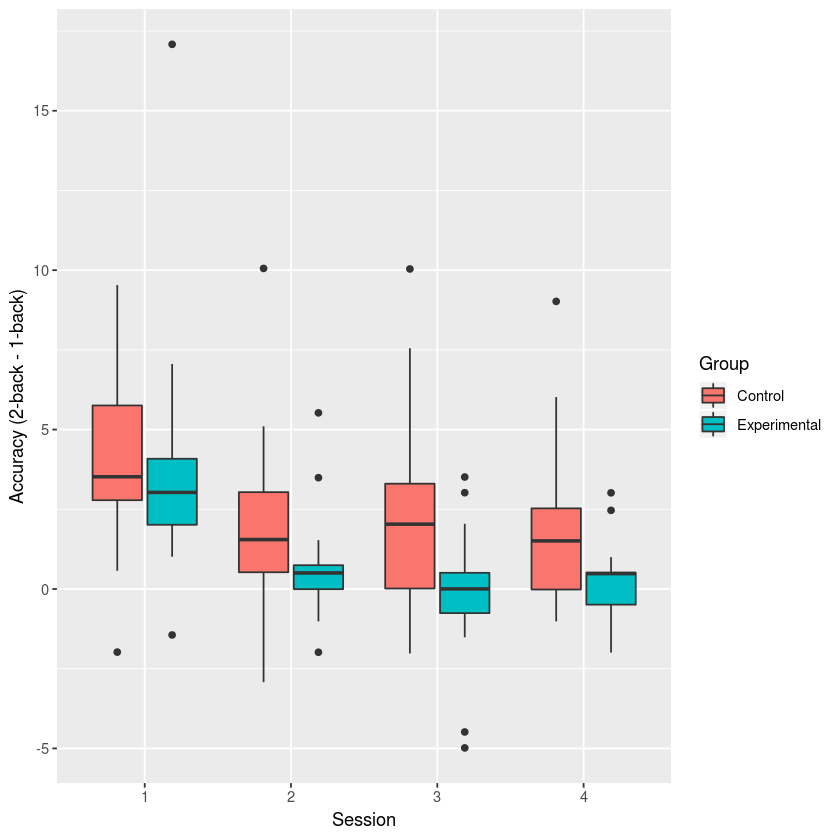

In [10]:
performance_diff %>% ggplot(aes(session, accuracy, fill = group)) +
    geom_boxplot() + 
    ylab("Accuracy (2-back - 1-back)") +
    xlab("Session") +
    guides(fill = guide_legend(title = "Group"))

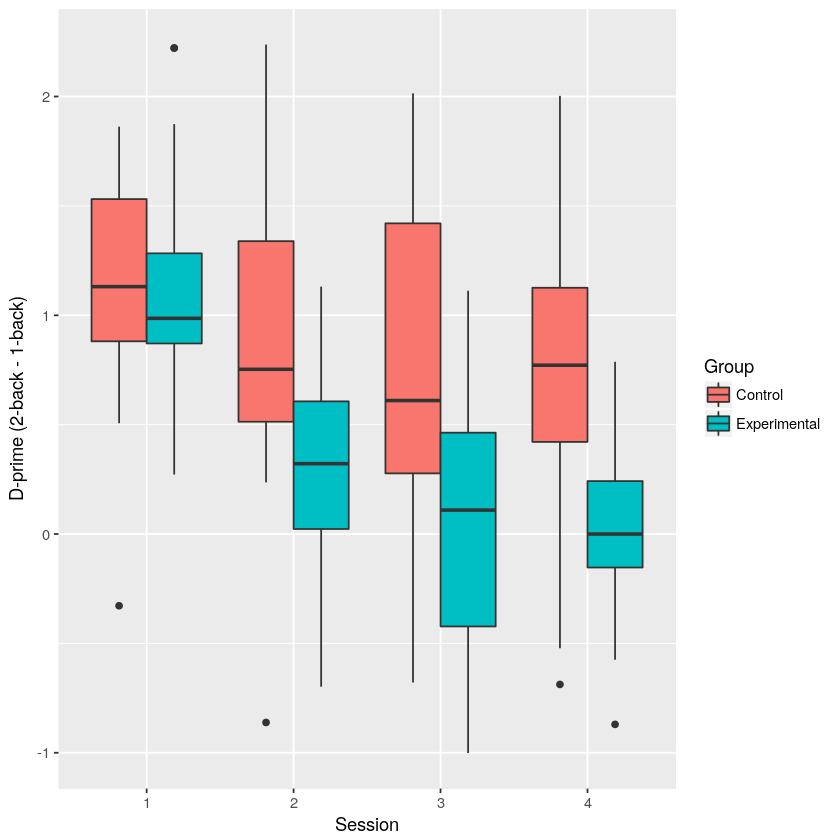

In [72]:
performance_diff %>% ggplot(aes(session, dprime, fill = group)) +
    geom_boxplot() +
    ylab("D-prime (2-back - 1-back)") +
    xlab("Session") +
    guides(fill = guide_legend(title = "Group"))

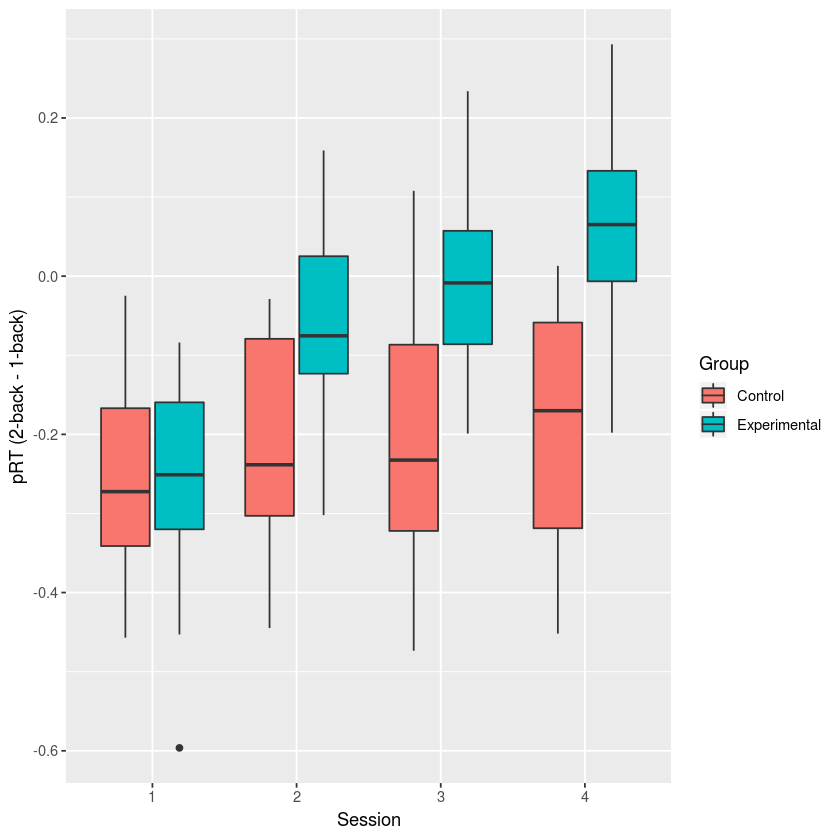

In [11]:
performance_diff %>%  ggplot(aes(session, prt, fill = group)) +
    geom_boxplot() +
    ylab("pRT (2-back - 1-back)") +
    xlab("Session") +
    guides(fill = guide_legend(title = "Group"))
    


In [12]:
performance_diff$session <- as.numeric(performance_diff$session)

performance_lm <- performance_diff %>%
    nest(-sub) %>% mutate(model = map(data, ~ lm(prt ~ session, data = .))) %>%
    mutate(tidied = map(model, tidy)) %>% 
    unnest(tidied)

head(performance_lm)


sub,term,estimate,std.error,statistic,p.value
sub-01,(Intercept),-0.34607333,0.17115658,-2.0219692,0.1805463
sub-01,session,0.09621400,0.06249755,1.5394845,0.2635658
sub-02,(Intercept),-0.34722000,0.18309927,-1.8963484,0.1983700
sub-02,session,0.04577683,0.06685840,0.6846834,0.5642398
sub-04,(Intercept),-0.44132333,0.17925083,-2.4620435,0.1328714
sub-04,session,0.03897483,0.06545315,0.5954616,0.6119412


Joining, by = "sub"


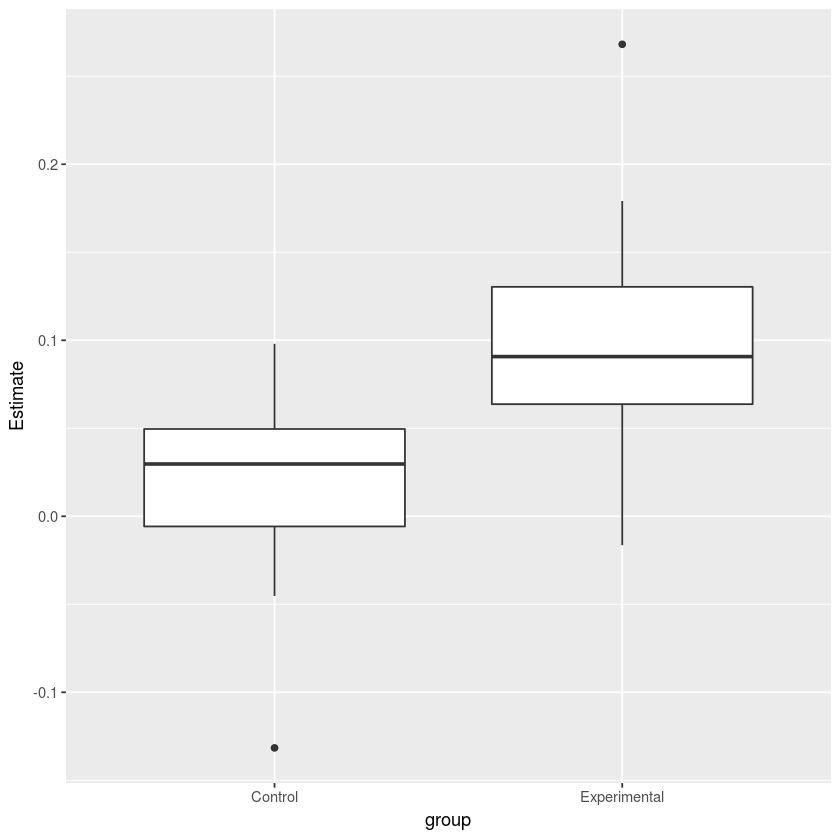

In [13]:
# Selecting rows with linear regression estimates
performance_slope  <- performance_lm %>% filter(term == "session") %>% 
    rename(Estimate = estimate) %>%
    select(sub, Estimate)

performance_slope <- left_join(performance_slope, group_vector) 

ggplot(performance_slope, aes(group, Estimate)) + 
    geom_boxplot()

In [14]:
performance_slope

sub,Estimate,group
sub-01,0.096214000,Control
sub-02,0.045776833,Control
sub-04,0.038974833,Control
sub-05,-0.016430333,Experimental
sub-06,0.268154167,Experimental
sub-07,0.124309000,Experimental
sub-08,-0.131592667,Control
sub-10,0.031744333,Control
sub-11,0.179143667,Experimental
sub-12,0.086507833,Control


In [15]:
# Writing training summary to a table
write.csv(performance_slope,  file = "/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/LB_fmri_beh_slope.csv", row.names = FALSE)

In [6]:
training_summary <- read.csv("data/LB_training_summary.csv")

performance_global <- left_join(performance_slope, training_summary)
head(performance_global)


ERROR: Error in left_join(performance_slope, training_summary): object 'performance_slope' not found



	Pearson's product-moment correlation

data:  performance_global$Estimate and performance_global$nback_max_level
t = 1.8331, df = 21, p-value = 0.081
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.04817363  0.67956837
sample estimates:
      cor 
0.3714036 


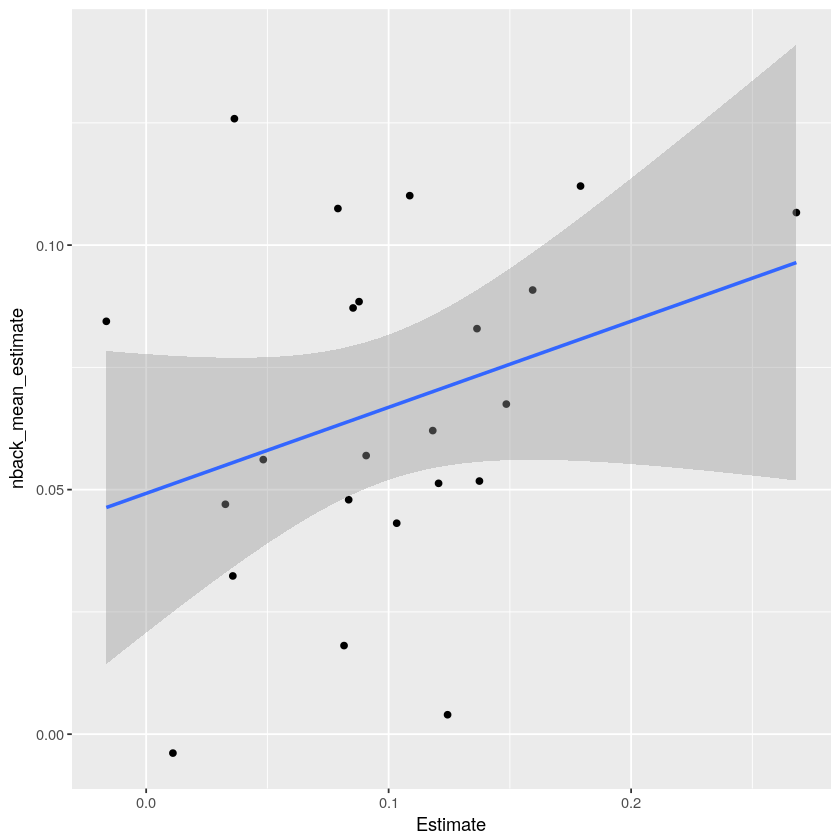

In [125]:
performance_global %>% filter (group == "Experimental") %>% ggplot(aes(Estimate, nback_mean_estimate)) +
    geom_point() + geom_smooth(method = "lm")

cor.test(performance_global$Estimate, performance_global$nback_mean_estimate)